In [1]:
import numpy as np
from models import inception_v3 as googlenet
import matplotlib.pyplot as plt

%matplotlib inline

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)
Scipy not supported!


In [2]:
WIDTH = 480
HEIGHT = 270
LR = 1e-3
EPOCHS = 1

OBSTACLE = [0, 1]
NO_OBSTACLE = [1, 0]

In [3]:
model = googlenet(WIDTH, HEIGHT, 3, LR, output=2)
MODEL_NAME = 'Binary Classifier v3'
model.load(MODEL_NAME)

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
INFO:tensorflow:Restoring parameters from /home/me/prj/disabled/path/Binary Classifier v3


In [4]:
def predict_on_model(test_data):    
    predictions = [model.predict([item[0].reshape(WIDTH,HEIGHT,3)])[0] for item in test_data]
    results = []
    for i in range(len(test_data)):
        if predictions[i][0] > predictions[i][1]:
            results.append(NO_OBSTACLE)
        else:
            results.append(OBSTACLE)
    return results

In [5]:
def get_label(code):
    if code == OBSTACLE:
        return 'Препятствие есть'
    elif code == NO_OBSTACLE:
        return 'Препятствия нет'
    else:
        raise ValueError("{} is incorrect input. Should be either [1, 0] or [0, 1]".format(code))

In [6]:
def divide_test_results(actual, pred):
    correct = [actual[i]
               for i in range(len(actual)) 
               if actual[i][1] == pred[i]]
    wrong = [actual[i] 
             for i in range(len(actual)) 
             if actual[i][1] != pred[i]]
    return correct, wrong

In [ ]:
data = np.load('fault/test.npy')
results = predict_on_model(data)
correct, wrong = divide_test_results(data, results)

# Правильно классифицированные изображения

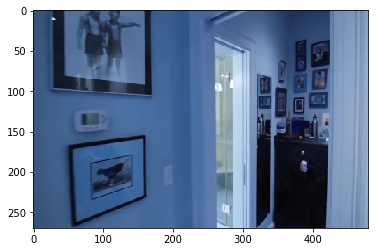

Actual: Препятствие есть     Predicted: Препятствие есть


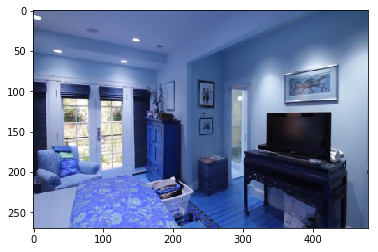

Actual: Препятствие есть     Predicted: Препятствие есть


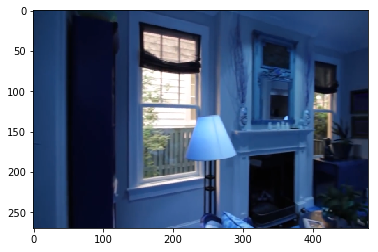

Actual: Препятствие есть     Predicted: Препятствие есть


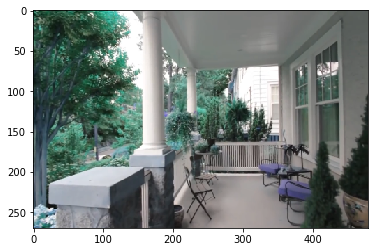

Actual: Препятствие есть     Predicted: Препятствие есть


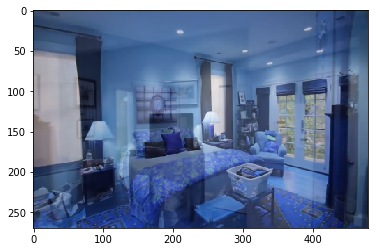

Actual: Препятствие есть     Predicted: Препятствие есть


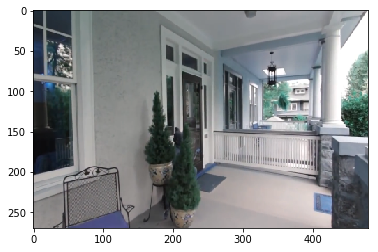

Actual: Препятствие есть     Predicted: Препятствие есть


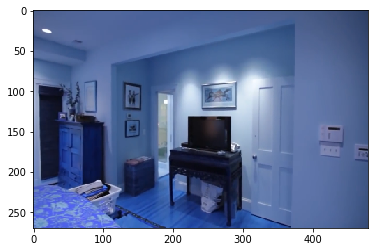

Actual: Препятствие есть     Predicted: Препятствие есть


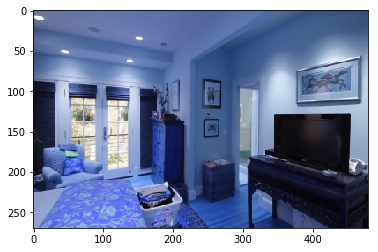

Actual: Препятствие есть     Predicted: Препятствие есть


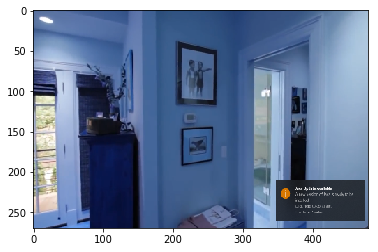

Actual: Препятствие есть     Predicted: Препятствие есть


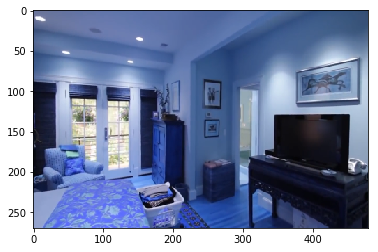

Actual: Препятствие есть     Predicted: Препятствие есть


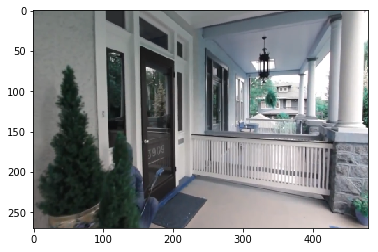

Actual: Препятствие есть     Predicted: Препятствие есть


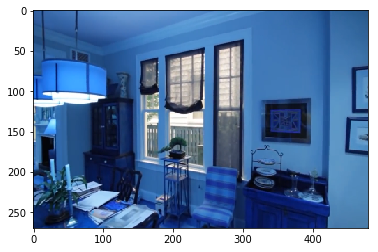

Actual: Препятствие есть     Predicted: Препятствие есть


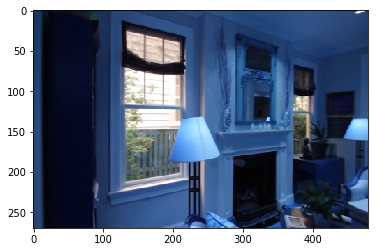

Actual: Препятствие есть     Predicted: Препятствие есть


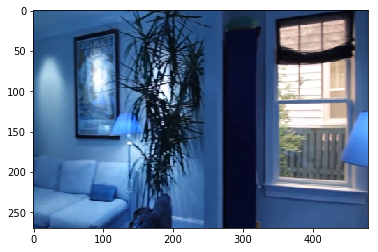

Actual: Препятствие есть     Predicted: Препятствие есть


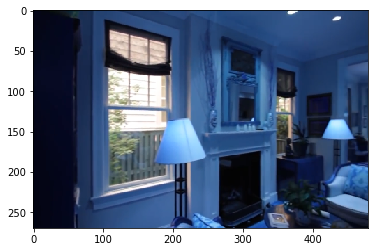

Actual: Препятствие есть     Predicted: Препятствие есть


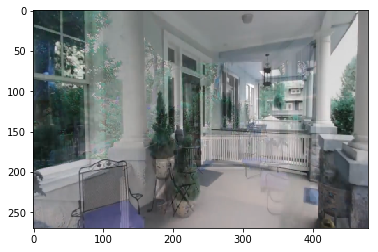

Actual: Препятствие есть     Predicted: Препятствие есть


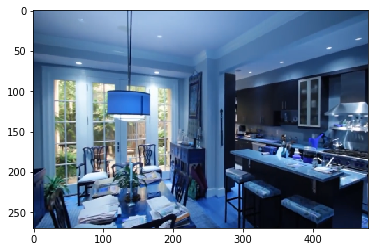

Actual: Препятствие есть     Predicted: Препятствие есть


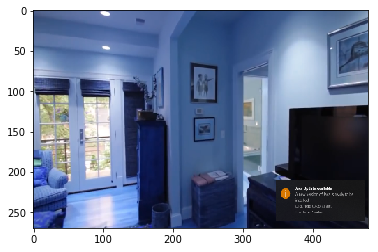

Actual: Препятствие есть     Predicted: Препятствие есть


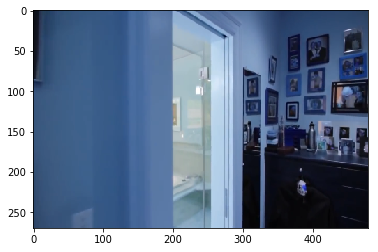

Actual: Препятствие есть     Predicted: Препятствие есть


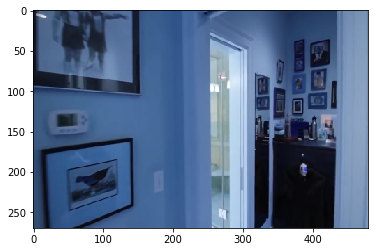

Actual: Препятствие есть     Predicted: Препятствие есть


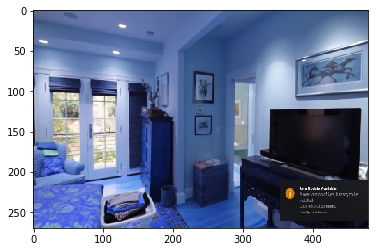

Actual: Препятствие есть     Predicted: Препятствие есть


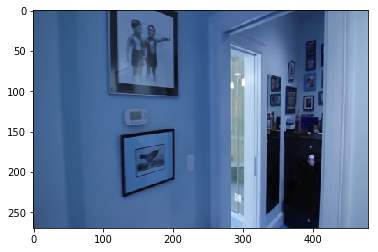

Actual: Препятствие есть     Predicted: Препятствие есть


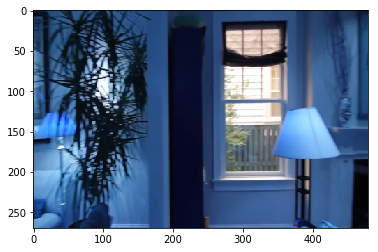

Actual: Препятствие есть     Predicted: Препятствие есть


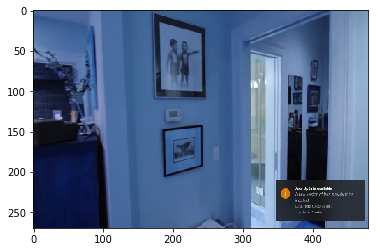

Actual: Препятствие есть     Predicted: Препятствие есть


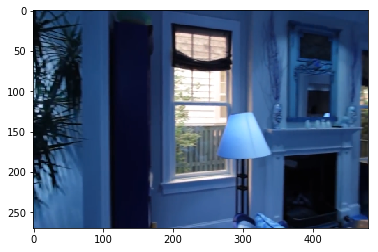

Actual: Препятствие есть     Predicted: Препятствие есть


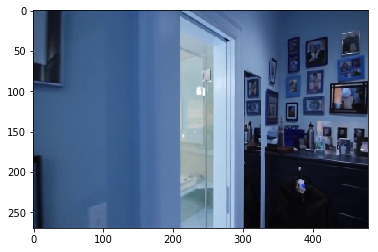

Actual: Препятствие есть     Predicted: Препятствие есть


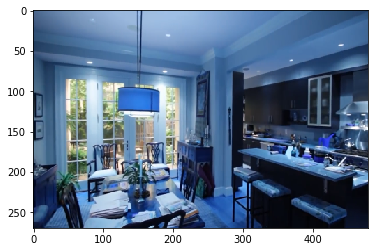

Actual: Препятствие есть     Predicted: Препятствие есть


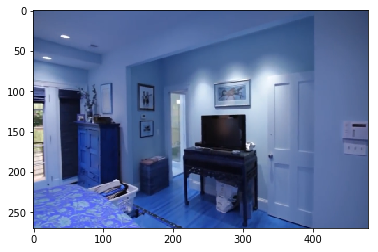

Actual: Препятствие есть     Predicted: Препятствие есть


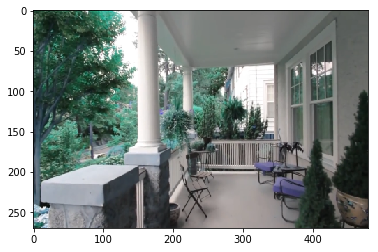

Actual: Препятствие есть     Predicted: Препятствие есть


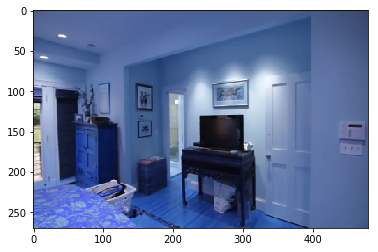

Actual: Препятствие есть     Predicted: Препятствие есть


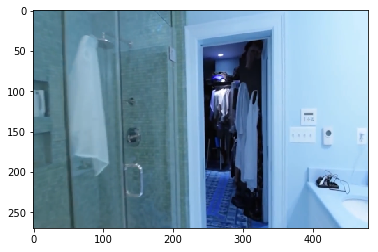

Actual: Препятствие есть     Predicted: Препятствие есть


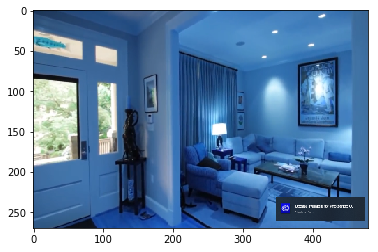

Actual: Препятствие есть     Predicted: Препятствие есть


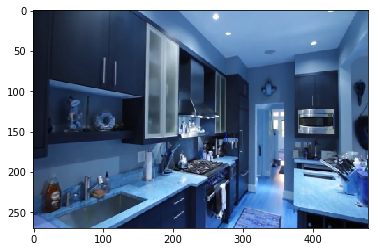

Actual: Препятствие есть     Predicted: Препятствие есть


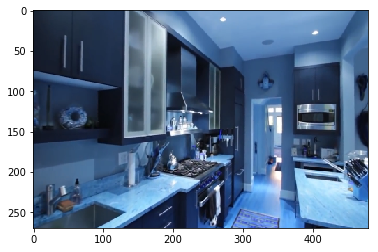

Actual: Препятствие есть     Predicted: Препятствие есть


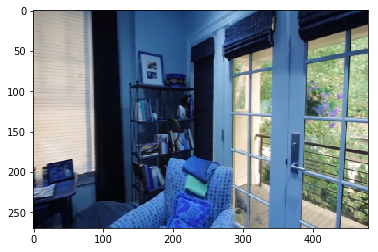

Actual: Препятствие есть     Predicted: Препятствие есть


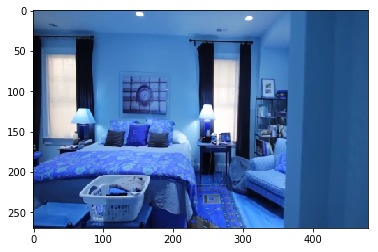

Actual: Препятствие есть     Predicted: Препятствие есть


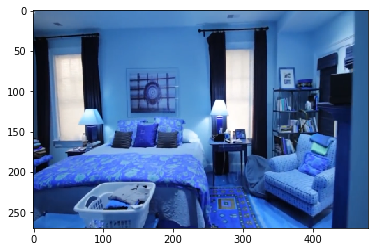

Actual: Препятствие есть     Predicted: Препятствие есть


In [ ]:
for i in range(len(correct)):
    plt.imshow(correct[i][0], aspect='auto')
    plt.show()
    print('Actual:', get_label(correct[i][1]), '   ', 'Predicted:', get_label(correct[i][1]))

# Неправильно классифицированные изображения

In [ ]:
for i in range(len(wrong)):
    plt.imshow(wrong[i][0], aspect='auto')
    plt.show()
    print('Actual:', get_label(wrong[i][1]), '   ', 'Predicted:', get_label(list(reversed(wrong[i][1]))))

In [ ]:
print("Правильно: {} Всего: {}".format(len(correct), len(data)))